In [74]:
%matplotlib inline

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import json

In [75]:
def load_dataset(tournament='World_Cup'):
    matches, events = {}, {}
    matches = json.load(open('./data/matches/matches_{}.json'.format(tournament)))
    events = json.load(open('./data/events/events_{}.json'.format(tournament)))
    return matches, events

def get_match(matches, events):
    match_id2events = defaultdict(list)
    match_id2match = defaultdict(dict)
    for event in events:
        match_id = event['matchId']
        match_id2events[match_id].append(event)
                                         
    for match in matches:
        match_id = match['wyId']
        match_id2match[match_id] = match
    
    return match_id2events, match_id2match
    
def get_player():
    players = json.load(open('./data/players.json'))
    player_id2player = defaultdict(dict)
    for player in players:
        player_id = player['wyId']
        player_id2player[player_id] = player
    return player_id2player
        
def get_competitions():
    competitions = json.load(open('./data/competitions.json'))
    competition_id2competition = defaultdict(dict)
    for competition in competitions:
        competition_id = competition['wyId']
        competition_id2competition[competition_id] = competition
    return competition_id2competition

def get_teams():
    teams = json.load(open('./data/teams.json'))
    team_id2team = defaultdict(dict)
    for team in teams:
        team_id = team['wyId']
        team_id2team[team_id] = team
    return team_id2team

In [76]:
matches, events = load_dataset()

In [77]:
match_id2events, match_id2match = get_match(matches, events)
player_id2player = get_player()
competition_id2competition = get_competitions()
team_id2team = get_teams()

In [78]:
player_id2player[32777]

{'passportArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'weight': 78,
 'firstName': 'Harun',
 'middleName': '',
 'lastName': 'Tekin',
 'currentTeamId': 4502,
 'birthDate': '1989-06-17',
 'height': 187,
 'role': {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'},
 'birthArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'wyId': 32777,
 'foot': 'right',
 'shortName': 'H. Tekin',
 'currentNationalTeamId': 4687}

In [79]:
match_id2events[2058017]

[{'eventId': 8,
  'subEventName': 'Simple pass',
  'tags': [],
  'playerId': 14943,
  'positions': [{'y': 51, 'x': 50}],
  'matchId': 2058017,
  'eventName': 'Pass',
  'teamId': 9598,
  'matchPeriod': '1H',
  'eventSec': 1.8923389999999927,
  'subEventId': 85,
  'id': 263883958},
 {'eventId': 8,
  'subEventName': 'Simple pass',
  'tags': [{'id': 1801}],
  'playerId': 69968,
  'positions': [{'y': 52, 'x': 39}, {'y': 74, 'x': 34}],
  'matchId': 2058017,
  'eventName': 'Pass',
  'teamId': 9598,
  'matchPeriod': '1H',
  'eventSec': 3.8893749999999727,
  'subEventId': 85,
  'id': 263883959},
 {'eventId': 8,
  'subEventName': 'Simple pass',
  'tags': [{'id': 1801}],
  'playerId': 8287,
  'positions': [{'y': 74, 'x': 34}, {'y': 93, 'x': 30}],
  'matchId': 2058017,
  'eventName': 'Pass',
  'teamId': 9598,
  'matchPeriod': '1H',
  'eventSec': 6.140945999999985,
  'subEventId': 85,
  'id': 263883960},
 {'eventId': 8,
  'subEventName': 'Simple pass',
  'tags': [{'id': 1801}],
  'playerId': 69409,

In [8]:
match_id2match[2058017]

{'status': 'Played',
 'roundId': 4165368,
 'gameweek': 0,
 'teamsData': {'9598': {'scoreET': 0,
   'coachId': 122788,
   'side': 'away',
   'teamId': 9598,
   'score': 2,
   'scoreP': 0,
   'hasFormation': 1,
   'formation': {'bench': [{'playerId': 69964,
      'assists': '0',
      'goals': 'null',
      'ownGoals': '0',
      'redCards': '0',
      'yellowCards': '0'},
     {'playerId': 69353,
      'assists': '0',
      'goals': 'null',
      'ownGoals': '0',
      'redCards': '0',
      'yellowCards': '0'},
     {'playerId': 212604,
      'assists': '0',
      'goals': 'null',
      'ownGoals': '0',
      'redCards': '0',
      'yellowCards': '0'},
     {'playerId': 69400,
      'assists': '0',
      'goals': 'null',
      'ownGoals': '0',
      'redCards': '0',
      'yellowCards': '0'},
     {'playerId': 230626,
      'assists': '0',
      'goals': 'null',
      'ownGoals': '0',
      'redCards': '0',
      'yellowCards': '0'},
     {'playerId': 69404,
      'assists': '0',
     

In [9]:
competition_id2competition[28]

{'name': 'World Cup',
 'wyId': 28,
 'format': 'International cup',
 'area': {'name': '', 'id': 0, 'alpha3code': 'XWO', 'alpha2code': ''},
 'type': 'international'}

In [10]:
team_id2team[9598]

{'city': 'Zagreb',
 'name': 'Croatia',
 'wyId': 9598,
 'officialName': 'Croatia',
 'area': {'name': 'Croatia',
  'id': 191,
  'alpha3code': 'HRV',
  'alpha2code': 'HR'},
 'type': 'national'}

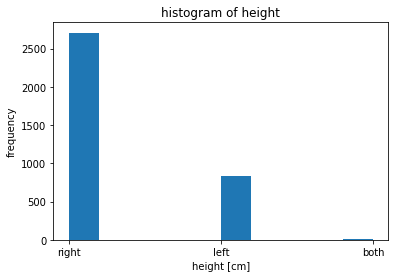

In [11]:
foot = [player['foot'] for player in player_id2player.values() if player['foot'] == 'right' or player['foot'] == 'left' or player['foot'] == 'both']
fig,ax = plt.subplots(1,1)
ax.hist(foot)
ax.set_title("histogram of height")
ax.set_xlabel('height [cm]')
ax.set_ylabel('frequency')
plt.show()

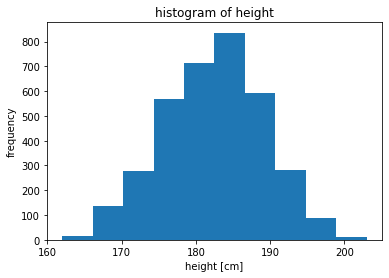

In [12]:
heights = [player['height'] for player in player_id2player.values() if player['height'] > 0]
fig,ax = plt.subplots(1,1)
ax.hist(heights)
ax.set_title("histogram of height")
ax.set_xlabel('height [cm]')
ax.set_ylabel('frequency')
plt.show()

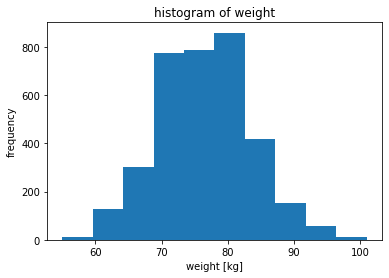

In [13]:
weight = [player['weight'] for player in player_id2player.values() if player['weight'] > 0]
fig,ax = plt.subplots(1,1)
ax.hist(weight)
ax.set_title("histogram of weight")
ax.set_xlabel('weight [kg]')
ax.set_ylabel('frequency')
plt.show()

In [15]:
scores = []
for match in match_id2match.values():
    score = 0
    for team in match['teamsData'].values():
        score += team['score']
    scores.append(score)

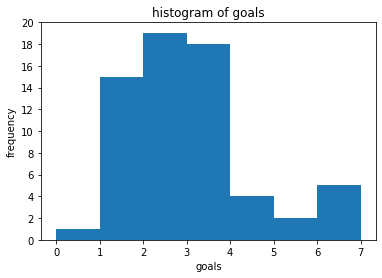

In [16]:
scores = np.array(scores)
fig,ax = plt.subplots(1,1)
ax.hist(scores, bins = [0, 1, 2, 3, 4, 5, 6, 7])
ax.set_title("histogram of goals")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xlabel('goals')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
ax.set_ylabel('frequency')
plt.show()

In [66]:
event_key = []
sub_event_key = []

for events in match_id2events.values():
    for event in events:
        event_key.append(event['eventName'])
        sub_event_key.append(event['subEventName'])
        
event_key = list(set(event_key))
sub_event_key = list(set(sub_event_key))

In [34]:
set(event_key)

{'Duel',
 'Foul',
 'Free Kick',
 'Goalkeeper leaving line',
 'Offside',
 'Others on the ball',
 'Pass',
 'Save attempt',
 'Shot'}

In [70]:
set(sub_event_key)

{'',
 'Acceleration',
 'Air duel',
 'Clearance',
 'Corner',
 'Cross',
 'Foul',
 'Free Kick',
 'Free kick cross',
 'Free kick shot',
 'Goal kick',
 'Goalkeeper leaving line',
 'Ground attacking duel',
 'Ground defending duel',
 'Ground loose ball duel',
 'Hand foul',
 'Hand pass',
 'Head pass',
 'High pass',
 'Late card foul',
 'Launch',
 'Out of game foul',
 'Penalty',
 'Protest',
 'Reflexes',
 'Save attempt',
 'Shot',
 'Simple pass',
 'Simulation',
 'Smart pass',
 'Throw in',
 'Time lost foul',
 'Touch',
 'Violent Foul'}

In [68]:
event_stats = []
sub_event_stats = []

for events in match_id2events.values():
    event_stat = {key: 0 for key in event_key}
    sub_event_stat = {key: 0 for key in sub_event_key}
    
    for event in events:
        event_stat[event['eventName']] += 1
        sub_event_stat[event['subEventName']] += 1

    event_stats.append(event_stat)
    sub_event_stats.append(sub_event_stat)

In [69]:
event_stats[0]

{'Duel': 468,
 'Others on the ball': 128,
 'Goalkeeper leaving line': 0,
 'Pass': 827,
 'Foul': 32,
 'Shot': 18,
 'Save attempt': 7,
 'Offside': 4,
 'Free Kick': 105}

In [31]:
sub_event_stats[0]

{'Simple pass': 658,
 'High pass': 59,
 'Air duel': 114,
 'Ground attacking duel': 140,
 'Ground defending duel': 143,
 'Throw in': 59,
 'Foul': 31,
 'Free Kick': 23,
 'Clearance': 28,
 'Touch': 82,
 'Ground loose ball duel': 71,
 'Corner': 8,
 'Head pass': 54,
 'Launch': 31,
 'Acceleration': 18,
 'Shot': 18,
 'Smart pass': 7,
 'Cross': 16,
 'Reflexes': 5,
 '': 4,
 'Hand pass': 2,
 'Goal kick': 10,
 'Free kick cross': 4,
 'Hand foul': 1,
 'Save attempt': 2,
 'Free kick shot': 1}

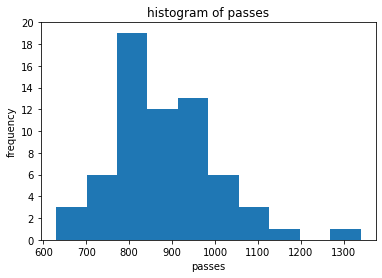

In [71]:
pass_stat = [event['Pass'] for event in event_stats if 'Pass' in event]
fig,ax = plt.subplots(1,1)
ax.hist(pass_stat)
ax.set_title("histogram of passes")
ax.set_xlabel('passes')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
ax.set_ylabel('frequency')
plt.show()

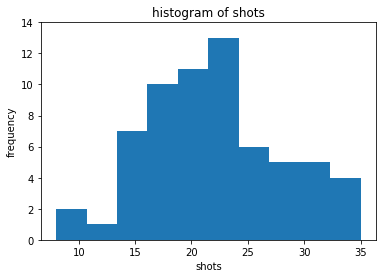

In [99]:
shot_stat = [event['Shot'] for event in event_stats if 'Shot' in event]
fig,ax = plt.subplots(1,1)
ax.hist(shot_stat)
ax.set_title("histogram of shots")
ax.set_xlabel('shots')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_ylabel('frequency')
plt.show()

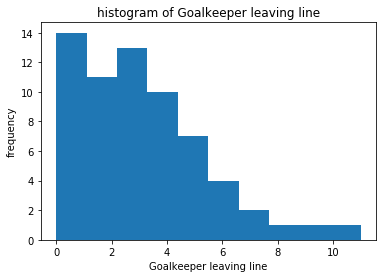

In [100]:
leaving_line_stat = [event['Goalkeeper leaving line'] for event in sub_event_stats if 'Goalkeeper leaving line' in event]
fig,ax = plt.subplots(1,1)
ax.hist(leaving_line_stat)
ax.set_title("histogram of Goalkeeper leaving line")
ax.set_xlabel('Goalkeeper leaving line')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_ylabel('frequency')
plt.show()